In [1]:
# Import libraries

import pandas as pd                   # data analysis library
import matplotlib.pyplot as plt       # data visualization library
import seaborn as sns                 # enhanced data visualization library
import numpy as np                    # numerical computational library
import datetime as dt                 # date & time manipulation library
import random

import yahoo_fin as yf                # data scraping library
import yahoo_fin.stock_info as si     # module from library for stock_info


from pandas_datareader import data    # remote data access for Pandas
from random import choice             # randomly select an item from a list of items
from random import shuffle            # randomly shuffle items in a list of items

# Download packages
#%pip install package_name

# Dependancy for yahoo_fin is requests_html

In [2]:
# Generate list of tickers listed on SP500
tickers = si.tickers_sp500()

# Set seed
#random.seed(123)


# Pull a random list of 50 tickers from above list
tickers = ['ADBE', 'CRM', 'CSCO', 'NVDA', 'V', 'INTU', 'TXN', 'VZ', 'SBUX', 'UPS', 'MA', 'KO', 'PG', 'TAN', 'ICLN', 'HD', 'WMT', 'UNH', 'TMO', 'LIN', 'PYPL', 'DIS', 'CMCSA', 'NFLX','PEP']



# Instantiate dictionary to hold our scraped data    
sp_quotes = {}

# Loop through each ticker from the list of tickers
for ticker in tickers:
    temp = si.get_quote_table(ticker, dict_result = False)   # scrape quote table
    sp_quotes[ticker] = temp                                 # populate prior dictionary

    
    
    
# Combine all the valutation measures into a single DataFrame
sp_quotes = pd.concat(sp_quotes)               # combine
sp_quotes = sp_quotes.reset_index()            # reset index into integers (it's currently tickers)

# Remove unnecessary column
del sp_quotes["level_1"]


# Update column names
sp_quotes.columns = ["Ticker", "Attribute", "Value"]
sp_quotes

,Ticker,Attribute,Value
0,ADBE,1y Target Est,563.3
1,ADBE,52 Week Range,255.13 - 536.88
2,ADBE,Ask,494.22 x 1100
3,ADBE,Avg. Volume,2.54759e+06
4,ADBE,Beta (5Y Monthly),0.97
...,...,...,...
420,PEP,Open,134.06
421,PEP,PE Ratio (TTM),26.26
422,PEP,Previous Close,134.38
423,PEP,Quote Price,134.46


In [5]:
# Create feature
div_filter = sp_quotes['Attribute'] == 'Forward Dividend & Yield'


# Apply filter
div_yields = sp_quotes[div_filter]


# Check data
div_yields

,Ticker,Attribute,Value
10,ADBE,Forward Dividend & Yield,N/A (N/A)
27,CRM,Forward Dividend & Yield,N/A (N/A)
44,CSCO,Forward Dividend & Yield,1.48 (3.18%)
61,NVDA,Forward Dividend & Yield,0.64 (0.11%)
78,V,Forward Dividend & Yield,1.28 (0.62%)
95,INTU,Forward Dividend & Yield,2.36 (0.56%)
112,TXN,Forward Dividend & Yield,4.08 (2.26%)
129,VZ,Forward Dividend & Yield,2.51 (4.64%)
146,SBUX,Forward Dividend & Yield,1.80 (1.70%)
163,UPS,Forward Dividend & Yield,4.08 (2.52%)


In [6]:
# Top 10 tickers based on HIGHEST dividend yield

# Hide warnings
import warnings
warnings.filterwarnings('ignore')


# Extract the yield using REGEX
div_yields['Yield'] = div_yields.Value.str.extract(r'\((.*?)\%',  
                                                   expand = True) 


# Change type to float
div_yields['Yield'] = div_yields['Yield'].astype(float)


# Drop the Value column
div_yields.drop('Value', axis = 1, inplace = True)


# Place quantitative cut for top 10 tickers
top_div_yields = div_yields.nlargest(10, 'Yield')

# Print top tickers
top_div_yields

,Ticker,Attribute,Yield
129,VZ,Forward Dividend & Yield,4.64
197,KO,Forward Dividend & Yield,3.26
44,CSCO,Forward Dividend & Yield,3.18
418,PEP,Forward Dividend & Yield,3.04
163,UPS,Forward Dividend & Yield,2.52
214,PG,Forward Dividend & Yield,2.47
112,TXN,Forward Dividend & Yield,2.26
265,HD,Forward Dividend & Yield,2.16
384,CMCSA,Forward Dividend & Yield,1.89
146,SBUX,Forward Dividend & Yield,1.70


In [7]:
# Save tickers for later

div_yield_tickers = top_div_yields['Ticker'].to_list()

div_yield_tickers

['VZ', 'KO', 'CSCO', 'PEP', 'UPS', 'PG', 'TXN', 'HD', 'CMCSA', 'SBUX']

In [8]:
# P/E Ratio Comparison

# Create filter
pe_ratio_filter = sp_quotes["Attribute"] == "PE Ratio (TTM)"


# Subset data using filter
pe_ratios = sp_quotes[pe_ratio_filter]


# Check data
pe_ratios

,Ticker,Attribute,Value
13,ADBE,PE Ratio (TTM),45.36
30,CRM,PE Ratio (TTM),64.19
47,CSCO,PE Ratio (TTM),19.35
64,NVDA,PE Ratio (TTM),97.47
81,V,PE Ratio (TTM),42.84
98,INTU,PE Ratio (TTM),55.84
115,TXN,PE Ratio (TTM),29.91
132,VZ,PE Ratio (TTM),13.25
149,SBUX,PE Ratio (TTM),183.87
166,UPS,PE Ratio (TTM),98.17


In [9]:
# Select top 10 stocks in terms of LOWEST P/E ratio

# Convert recent column to integer (it's currently object / string)
pe_ratios['Value'] = pe_ratios['Value'].astype(float)

# Select the top 20 tickers
lowest_pe_ratios = pe_ratios.nsmallest(20,'Value')

# Print
lowest_pe_ratios

,Ticker,Attribute,Value
132,VZ,PE Ratio (TTM),13.25
47,CSCO,PE Ratio (TTM),19.35
302,UNH,PE Ratio (TTM),20.39
285,WMT,PE Ratio (TTM),21.24
387,CMCSA,PE Ratio (TTM),23.24
217,PG,PE Ratio (TTM),24.27
268,HD,PE Ratio (TTM),24.30
421,PEP,PE Ratio (TTM),26.26
200,KO,PE Ratio (TTM),28.01
115,TXN,PE Ratio (TTM),29.91


In [10]:
# Save tickers for later

pe_ratios_tickers = lowest_pe_ratios['Ticker'].to_list()

pe_ratios_tickers

['VZ',
 'CSCO',
 'UNH',
 'WMT',
 'CMCSA',
 'PG',
 'HD',
 'PEP',
 'KO',
 'TXN',
 'TMO',
 'V',
 'ADBE',
 'LIN',
 'MA',
 'INTU',
 'CRM',
 'PYPL',
 'NFLX',
 'NVDA']

In [11]:
# Instantiate dictionary to hold our scraped data    
sp_bs = {}

# Loop through each ticker from the list of tickers
for ticker in pe_ratios_tickers :
    temp = si.get_balance_sheet(ticker, yearly=True)     # scrape balance sheet data
    temp = temp.iloc[:,:2]                               # subset for attribute name & recent values
    temp.columns = ["2020", "2019"]                      # rename columns
    sp_bs[ticker] = temp                                # populate prior dictionary

# Combine all the balance sheet data into a single DataFrame
sp_bs = pd.concat(sp_bs)               # combine
sp_bs = sp_bs.reset_index()       # reset index into integers

# Rename columns
sp_bs.columns = ["Ticker", "Attribute", "2020", "2019"]

# Check data
sp_bs

,Ticker,Attribute,2020,2019
0,VZ,intangibleAssets,1.055100e+11,1.045570e+11
1,VZ,capitalSurplus,1.340400e+10,1.341900e+10
2,VZ,totalLiab,2.472090e+11,2.288920e+11
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
4,VZ,minorityInterest,1.430000e+09,1.440000e+09
...,...,...,...,...
519,NVDA,netReceivables,1.657000e+09,1.424000e+09
520,NVDA,longTermDebt,1.991000e+09,1.988000e+09
521,NVDA,inventory,9.790000e+08,1.575000e+09
522,NVDA,accountsPayable,6.870000e+08,5.110000e+08


In [12]:
# TOTAL STOCKHOLDER EQUITY

# Create filter for total stockholder equity
equityFilter = sp_bs['Attribute'] == 'totalStockholderEquity'

# Subset combined_bs DF for total stockholder equity
equityComparison = sp_bs[equityFilter]

equityComparison

,Ticker,Attribute,2020,2019
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
82,WMT,totalStockholderEquity,7.466900e+10,7.249600e+10
109,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
136,PG,totalStockholderEquity,4.562400e+10,4.626600e+10
161,HD,totalStockholderEquity,-3.116000e+09,-1.878000e+09
187,PEP,totalStockholderEquity,1.345400e+10,1.478600e+10
216,KO,totalStockholderEquity,1.929900e+10,1.898100e+10
244,TXN,totalStockholderEquity,9.187000e+09,8.907000e+09


In [13]:
# Quantitative Cut

# Select top 10 tickers based off total stockholder equity in 2020 & 2019
equityComparison.nlargest(10, ['2020', '2019'])

,Ticker,Attribute,2020,2019
109,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
82,WMT,totalStockholderEquity,7.466900e+10,7.249600e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
347,LIN,totalStockholderEquity,4.731700e+10,4.907400e+10
136,PG,totalStockholderEquity,4.562400e+10,4.626600e+10
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
270,TMO,totalStockholderEquity,3.450700e+10,2.967500e+10
428,CRM,totalStockholderEquity,3.388500e+10,1.560500e+10
296,V,totalStockholderEquity,3.112400e+10,2.922200e+10


In [14]:
# TOTAL STOCKHOLDER EQUITY & LONGTERM DEBT

# Create filter for total stockholder equity
equityFilter = sp_bs['Attribute'] == 'totalStockholderEquity'
debtFilter   = sp_bs['Attribute'] == 'longTermDebt' 

# Subset combined_bs DF for total stockholder equity
EqDbtComparison = sp_bs[equityFilter | debtFilter]

EqDbtComparison

,Ticker,Attribute,2020,2019
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
22,VZ,longTermDebt,1.231730e+11,1.007090e+11
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
50,CSCO,longTermDebt,1.157800e+10,1.447500e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
69,UNH,longTermDebt,3.864800e+10,3.680800e+10
82,WMT,totalStockholderEquity,7.466900e+10,7.249600e+10
102,WMT,longTermDebt,4.441000e+10,4.394800e+10
109,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
130,CMCSA,longTermDebt,1.049910e+11,1.029310e+11


In [15]:
# Quantitative Cut

# Select top 10 tickers in terms of highest debt & equity in 2020 & 2019
EqDbtComparison.drop_duplicates(subset = 'Ticker', 
                                keep = 'first').nlargest(10, ['2020', '2019'])

,Ticker,Attribute,2020,2019
109,CMCSA,totalStockholderEquity,9.032300e+10,8.272600e+10
82,WMT,totalStockholderEquity,7.466900e+10,7.249600e+10
54,UNH,totalStockholderEquity,6.832800e+10,5.761600e+10
3,VZ,totalStockholderEquity,6.784200e+10,6.139500e+10
347,LIN,totalStockholderEquity,4.731700e+10,4.907400e+10
136,PG,totalStockholderEquity,4.562400e+10,4.626600e+10
29,CSCO,totalStockholderEquity,3.792000e+10,3.357100e+10
270,TMO,totalStockholderEquity,3.450700e+10,2.967500e+10
428,CRM,totalStockholderEquity,3.388500e+10,1.560500e+10
296,V,totalStockholderEquity,3.112400e+10,2.922200e+10


In [16]:
# Save dataframe as csv

#combined_is.to_csv('./combined_income_statement.csv', header = True, index  = False)

In [17]:
# Our tickers from PE ratio quantitative cut

pe_ratios_tickers

['VZ',
 'CSCO',
 'UNH',
 'WMT',
 'CMCSA',
 'PG',
 'HD',
 'PEP',
 'KO',
 'TXN',
 'TMO',
 'V',
 'ADBE',
 'LIN',
 'MA',
 'INTU',
 'CRM',
 'PYPL',
 'NFLX',
 'NVDA']

In [18]:
# Equal Weights

pe_weights = pd.Series(index = pe_ratios_tickers, dtype = float)

pe_weights[pe_ratios_tickers] = random.random()

pe_weights = pe_weights / np.sum(pe_weights)

pe_weights

VZ       0.05
CSCO     0.05
UNH      0.05
WMT      0.05
CMCSA    0.05
PG       0.05
HD       0.05
PEP      0.05
KO       0.05
TXN      0.05
TMO      0.05
V        0.05
ADBE     0.05
LIN      0.05
MA       0.05
INTU     0.05
CRM      0.05
PYPL     0.05
NFLX     0.05
NVDA     0.05
dtype: float64

In [19]:
# Returns

# Lookback period
start_date = '2018-1-31'           # start day for lookback
end_date   = '2021-1-31'           # end day for lookback    


# Pull data
returns = data.DataReader(name        = pe_ratios_tickers, 
                          data_source = 'yahoo', 
                          start       = start_date, 
                          end         = end_date)['Adj Close']


# Calculate returns
returns = returns.pct_change().dropna()

# Check data
returns

Symbols,VZ,CSCO,UNH,WMT,CMCSA,PG,HD,PEP,KO,TXN,TMO,V,ADBE,LIN,MA,INTU,CRM,PYPL,NFLX,NVDA
Date,,,,,,,,,,,,,,,,,,,,
2018-02-01,0.004254,0.003852,-0.006589,-0.010131,-0.015048,-0.005675,-0.004977,0.000000,-0.002942,0.003738,-0.007809,0.011994,-0.001902,-0.010279,0.023254,-0.013401,-0.010271,-0.081106,-0.019349,-0.021562
2018-02-02,-0.024310,-0.018465,-0.014199,-0.009856,-0.018620,-0.018637,-0.029665,-0.013550,-0.015174,-0.021984,-0.021002,-0.038260,-0.018758,-0.029907,-0.013763,-0.013462,-0.017385,-0.023342,0.008903,-0.029023
2018-02-05,-0.046810,-0.052529,-0.051147,-0.042018,-0.046461,-0.037864,-0.055988,-0.035476,-0.039375,-0.032045,-0.043089,-0.038376,-0.027448,-0.030506,-0.034946,-0.035308,-0.028254,-0.024357,-0.049247,-0.084875
2018-02-06,0.006535,0.035843,0.023452,0.008093,0.011990,0.016284,0.043307,-0.007863,-0.004901,0.015929,0.005617,0.031822,0.022074,0.033196,0.028495,0.020425,0.017836,0.013051,0.045072,0.055592
2018-02-07,0.003541,0.004232,0.002842,0.019326,0.012100,-0.006555,0.001309,-0.000529,-0.002463,-0.036743,-0.009213,-0.002667,-0.010953,-0.034125,-0.003249,0.002611,0.004381,-0.001189,-0.004366,0.014274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,0.016530,0.005807,0.000748,-0.000888,0.005957,0.017231,0.003803,0.011473,0.005981,0.000637,0.008220,-0.005148,0.002117,0.006521,0.000608,-0.001120,0.000664,-0.016865,-0.014845,-0.004321
2021-01-26,-0.031667,0.005108,-0.013513,0.008960,0.022871,0.006428,-0.008699,0.011557,0.010455,-0.008385,-0.021202,0.005125,0.005999,0.010785,-0.004526,0.000988,0.001505,-0.027245,0.009250,-0.015967
2021-01-27,-0.025455,0.009722,-0.029495,-0.024880,-0.033340,-0.035390,-0.030255,-0.026516,-0.015419,-0.049805,-0.049918,-0.034850,-0.034182,-0.050577,-0.037260,-0.031190,-0.006541,-0.045892,-0.068781,-0.038518


In [24]:
def randomNumbers(list_of_weights, ticker, constraints, remaining):
    """
    This function will generate a random set of numbers between specified
    constraints which sum up to a specificied total.
    
    Parameters:
    
    list_of_weights = list of weights with tickers as index
    
    ticker = acts as index --- SET TO 0
    
    constraints = list of two floats to act as your constraints.
                    - 1st float is minimum constraint
                    - 2nd float is maximum constraint
    
    remaining = acts as the sum of random numbers --- SET TO 1
    """
    next_ticker = ticker + 1
    
    if next_ticker == len(list_of_weights):
        
        list_of_weights[ticker] = remaining                        
        
    else:
        
        remaining_tickers = len(list_of_weights) - next_ticker   
    
        remaining_lowerbound = constraints[0] * remaining_tickers  
        
        remaining_upperbound = constraints[1] * remaining_tickers 
        
        actual_lowerbound = max(constraints[0], remaining - remaining_upperbound)
        
        actual_upperbound = min(constraints[1], remaining - remaining_lowerbound)
        
        random_weight = np.random.uniform(low  = actual_lowerbound, 
                                          high = actual_upperbound)

        list_of_weights[ticker] = random_weight
        
        randomNumbers(list_of_weights, 
                      next_ticker, 
                      [actual_lowerbound, actual_upperbound],
                      (remaining - random_weight))

# Run function to get random numbers with constraints        
randomNumbers(list_of_weights = pe_weights,     # list of weights with ticker index
              ticker          = 0,              # index of of first ticker
              constraints     = [0.02, 0.1],    # minimum & maximum constraints
              remaining       = 1)              # sum of all random numbers

# Shuffle & print weights
shuffle(pe_weights)
pe_weights

VZ       0.020587
CSCO     0.020335
UNH      0.063054
WMT      0.059705
CMCSA    0.046585
PG       0.060200
HD       0.057649
PEP      0.020069
KO       0.036347
TXN      0.089123
TMO      0.081116
V        0.046475
ADBE     0.077283
LIN      0.020030
MA       0.084899
INTU     0.077207
CRM      0.042767
PYPL     0.020965
NFLX     0.020019
NVDA     0.055584
dtype: float64

In [25]:
# 20 ticker example


##############################################################################
# Prepare variables

# Create empty dataframes
portfolios         = pd.DataFrame()
portfolios_weights = pd.DataFrame()

# Number of assets
num_of_assets = len(pe_ratios_tickers)

# Instantiate covariance matrix
cov_mat = returns.cov()

# Number of iterations
n_iterations = 1000

# Risk free rate
rfr = 0


##############################################################################
# Monte Carlo Loop to build portfolio simulations

# Loop over each iteration
for i in range(n_iterations):
    
    # Create placeholder for weights
    weights = pd.Series(index = pe_ratios_tickers, dtype = float)
    
    # Generate a random weight between 0-1 with constraints
    randomNumbers(list_of_weights = weights,     # list of weights with ticker index
                  ticker          = 0,              # index of of first ticker
                  constraints     = [0.02, 0.1],    # minimum & maximum constraints
                  remaining       = 1)              # sum of all random numbers 
    
    # Shuffle weights
    shuffle(weights)
    
    # Loop over each ticker to create weights
    for ticker in pe_ratios_tickers:
            
        # Assign each weight to ticker in both portfolios & portfolios_weights
        portfolios_weights.loc[i, ticker] = weights[ticker]
        
        portfolios.loc[i, ticker] = weights[ticker]
    
    
    # Calculate portfolio returns
    
    # Step 1: Calculate weighted returns
    weighted_returns = returns.mul(portfolios_weights.iloc[i,:], axis = 1)
    
    # Step 2: Calculate expected returns per portfolio
    portfolios.loc[i, 'expected_return'] = \
        weighted_returns.sum(axis = 1).mean()
    
    # Calculate portfolio volatility
    portfolios.loc[i, 'volatility'] = \
        np.sqrt(np.dot(portfolios_weights.loc[i, :].T, 
                   np.dot(cov_mat, portfolios_weights.loc[i, :])))
    
    # Calculate Sharpe
    portfolios.loc[i, "sharpe_ratio"] = \
        (portfolios.loc[i, "expected_return"] - rfr) / \
         portfolios.loc[i, 'volatility']
    
    
# Check portfolio simulations
portfolios

,VZ,CSCO,UNH,WMT,CMCSA,PG,HD,PEP,KO,TXN,...,LIN,MA,INTU,CRM,PYPL,NFLX,NVDA,expected_return,volatility,sharpe_ratio
0,0.027300,0.025661,0.078489,0.038704,0.035752,0.020001,0.089710,0.047032,0.064441,0.022855,...,0.095233,0.020004,0.088799,0.047654,0.082424,0.020001,0.096986,0.000925,0.016137,0.057323
1,0.020976,0.061502,0.085782,0.052607,0.024079,0.081920,0.088420,0.055483,0.021126,0.045432,...,0.020671,0.044424,0.052422,0.081698,0.060912,0.071346,0.020109,0.000919,0.015638,0.058750
2,0.065116,0.039119,0.079519,0.049445,0.020039,0.087901,0.096638,0.021450,0.020038,0.045368,...,0.047966,0.052316,0.091835,0.043572,0.020279,0.065228,0.066589,0.000891,0.015436,0.057733
3,0.039609,0.021161,0.037724,0.033751,0.030411,0.075693,0.086909,0.020874,0.067572,0.082873,...,0.085181,0.076773,0.090975,0.023048,0.021419,0.043671,0.036058,0.000871,0.015330,0.056826
4,0.079772,0.059919,0.046022,0.070676,0.099287,0.037695,0.061351,0.024582,0.027062,0.034092,...,0.078729,0.026003,0.049040,0.032866,0.054581,0.025115,0.020827,0.000815,0.014609,0.055811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.021494,0.041716,0.082223,0.037569,0.020881,0.055448,0.054623,0.020013,0.079666,0.083406,...,0.072586,0.072659,0.034844,0.062546,0.060326,0.020174,0.034786,0.000888,0.015494,0.057326
996,0.043369,0.020409,0.084613,0.096004,0.022847,0.087461,0.021335,0.029820,0.086297,0.035714,...,0.021672,0.064393,0.020115,0.089012,0.059455,0.044879,0.056960,0.000896,0.014760,0.060719
997,0.041130,0.039812,0.082836,0.033038,0.087691,0.020044,0.020276,0.073018,0.020908,0.054975,...,0.064038,0.020154,0.043612,0.083869,0.034067,0.088653,0.042507,0.000895,0.015755,0.056835
998,0.063709,0.070130,0.067048,0.049296,0.033991,0.021366,0.020587,0.026021,0.022886,0.062591,...,0.041322,0.081258,0.065740,0.020158,0.020256,0.096529,0.055210,0.000937,0.015776,0.059397


In [26]:
# Identify max Sharpe Ratio & minimum Variance portfolio

max_sharpe_filter     = portfolios['sharpe_ratio'].idxmax()
min_volatility_filter = portfolios['volatility'].idxmin()

max_sharpe_portfolio     = portfolios.iloc[max_sharpe_filter, :]
min_volatility_portfolio = portfolios.iloc[min_volatility_filter, :]

print(f"""
     Max Sharpe Portfolio: 
-------------------------------
Index: {max_sharpe_filter}

{max_sharpe_portfolio}



   Min Volatility Portfolio: 
-------------------------------
Index: {min_volatility_filter}

{min_volatility_portfolio}""")


     Max Sharpe Portfolio: 
-------------------------------
Index: 955

VZ                 0.097073
CSCO               0.027017
UNH                0.065974
WMT                0.070027
CMCSA              0.022196
PG                 0.020000
HD                 0.020000
PEP                0.020049
KO                 0.060717
TXN                0.053188
TMO                0.099529
V                  0.022360
ADBE               0.094518
LIN                0.021214
MA                 0.020870
INTU               0.093922
CRM                0.020814
PYPL               0.098977
NFLX               0.051554
NVDA               0.020000
expected_return    0.000955
volatility         0.015097
sharpe_ratio       0.063283
Name: 955, dtype: float64



   Min Volatility Portfolio: 
-------------------------------
Index: 468

VZ                 0.082270
CSCO               0.020029
UNH                0.077186
WMT                0.091846
CMCSA              0.095421
PG                 0.020001
HD          

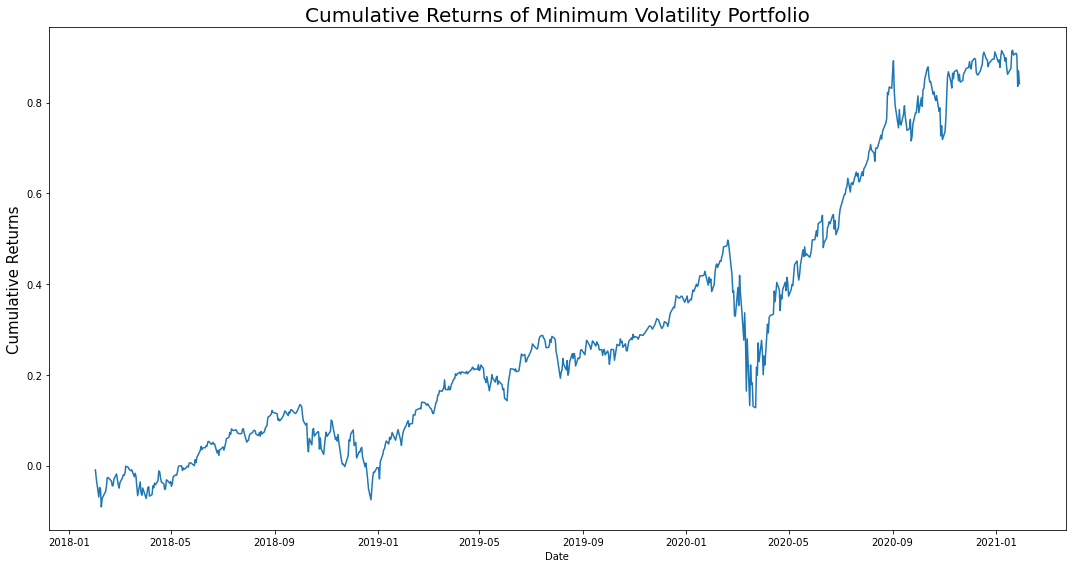

In [27]:
# Plot cumulative returns of minimum volatility portfolio

# Get weighted_returns
weighted_returns = returns.mul(portfolios_weights.iloc[328,:], axis = 1)


# Calculate total returns
total_returns    = weighted_returns.sum(axis = 1)


# Calculate cumulative returns
cumulative_returns = ((1 + total_returns).cumprod()-1)


##############################################################################
# Plot cumulative returns

# setting figure size
fig, ax = plt.subplots(figsize = (15, 8))


# histogram for returns
sns.lineplot(data  = cumulative_returns)


# this adds a title
plt.title(label    = "Cumulative Returns of Minimum Volatility Portfolio",
          fontsize = 20)


# this add a y-label
plt.ylabel(ylabel = 'Cumulative Returns', fontsize = 15)


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

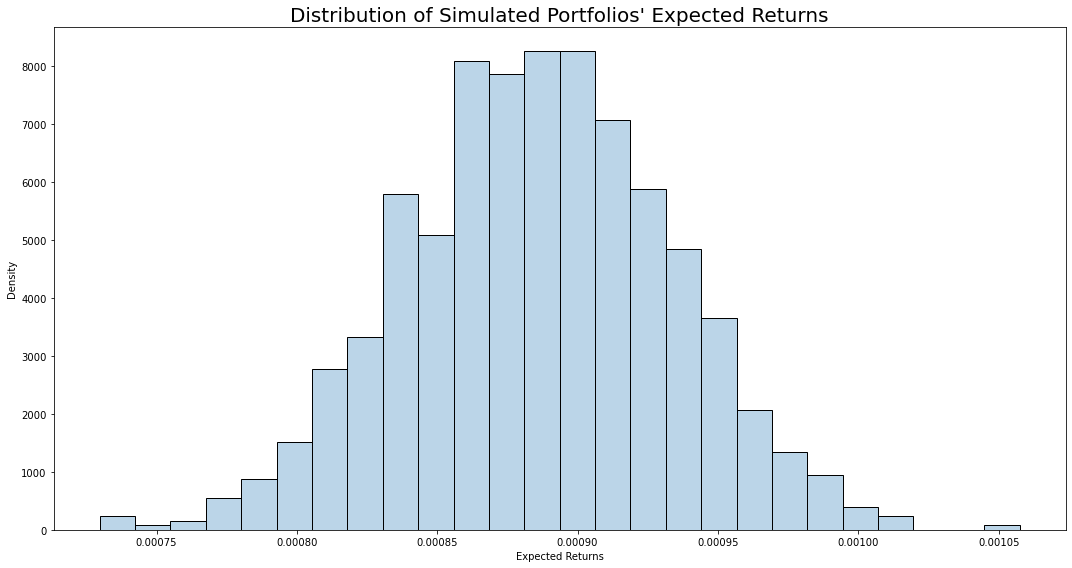

In [28]:
# Plot expected returns from portfolio simulations

expected_returns = portfolios['expected_return']

# setting figure size
fig, ax = plt.subplots(figsize = (15, 8))

# histogram for returns
sns.histplot(data  = expected_returns, # print portfolio returns
             bins  = 'fd',             # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,             # kernel density plot (line graph)
             alpha = 0.3,              # transparency of colors
             stat  = 'density')        # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label    = "Distribution of Simulated Portfolios' Expected Returns",
          fontsize = 20)


# this adds an x-label
plt.xlabel(xlabel = 'Expected Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()